In [143]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RANSACRegressor, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

In [144]:
df_btc= web.DataReader('BTC-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2021-12-12,50724.867188,48725.851562,49354.855469,50098.335938,2.193922e+10,50098.335938
2021-12-13,50205.000000,45894.847656,50114.742188,46737.480469,3.216673e+10,46737.480469
2021-12-14,48431.398438,46424.496094,46709.824219,46612.632812,3.463862e+10,46612.632812


In [145]:
df_btc = df_btc.rename({'High': 'btc_high', 'Low': 'btc_low','Open': 'btc_open', 'Close': 'btc_close','Volume':'btc_volume','Adj Close':'btc_adj_close'}, axis=1)
df_btc.columns

Index(['btc_high', 'btc_low', 'btc_open', 'btc_close', 'btc_volume',
       'btc_adj_close'],
      dtype='object')

In [146]:
df_eth= web.DataReader('ETH-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_eth


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,8.471230,7.982310,7.982310,8.172570,1.473170e+07,8.172570
2017-01-02,8.436330,8.054410,8.170870,8.378510,1.457960e+07,8.378510
2017-01-03,9.996800,8.317170,8.374580,9.725250,3.362520e+07,9.725250
2017-01-04,11.276400,9.559810,9.709290,11.251600,4.105120e+07,11.251600
2017-01-05,11.890900,9.402680,11.286800,10.254400,4.155740e+07,10.254400
...,...,...,...,...,...,...
2021-12-12,4173.608887,3993.055908,4084.811279,4134.453125,1.405760e+10,4134.453125
2021-12-13,4145.955078,3680.609131,4136.359863,3784.226807,2.399984e+10,3784.226807
2021-12-14,3866.633789,3700.104736,3782.822754,3745.440430,2.383676e+10,3745.440430


In [147]:
df_eth = df_eth.rename({'High': 'eth_high', 'Low': 'eth_low','Open': 'eth_open', 'Close': 'eth_close','Volume':'eth_volume','Adj Close':'eth_adj_close'}, axis=1)
df_eth.columns

Index(['eth_high', 'eth_low', 'eth_open', 'eth_close', 'eth_volume',
       'eth_adj_close'],
      dtype='object')

In [148]:
df_ltc= web.DataReader('LTC-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_ltc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,4.521530,4.328710,4.329120,4.511590,1.133750e+07,4.511590
2017-01-02,4.737660,4.484660,4.520450,4.648940,1.459530e+07,4.648940
2017-01-03,4.731840,4.564870,4.655880,4.626200,1.005570e+07,4.626200
2017-01-04,4.837850,4.633750,4.633750,4.837850,1.376240e+07,4.837850
2017-01-05,4.945860,4.226870,4.914370,4.292720,1.919600e+07,4.292720
...,...,...,...,...,...,...
2021-12-12,162.485016,153.610352,157.925339,159.203964,8.705768e+08,159.203964
2021-12-13,160.088211,143.166946,159.354431,144.535904,1.097150e+09,144.535904
2021-12-14,151.633057,143.422577,144.622055,146.078003,1.150775e+09,146.078003


In [149]:
df_ltc = df_ltc.rename({'High': 'ltc_high', 'Low': 'ltc_low','Open': 'ltc_open', 'Close': 'ltc_close','Volume':'ltc_volume','Adj Close':'ltc_adj_close'}, axis=1)
df_ltc.columns

Index(['ltc_high', 'ltc_low', 'ltc_open', 'ltc_close', 'ltc_volume',
       'ltc_adj_close'],
      dtype='object')

In [150]:
df_bnb= web.DataReader('BNB-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_bnb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-25,0.115841,0.101531,0.115203,0.105870,1.452690e+05,0.105870
2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,0.105138
2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,0.107737
2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,0.104067
2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,0.107811
...,...,...,...,...,...,...
2021-12-12,574.185059,559.515259,564.141418,570.823975,1.307635e+09,570.823975
2021-12-13,572.882385,511.998474,571.177429,521.011597,1.900968e+09,521.011597
2021-12-14,536.297668,510.420776,520.631714,511.229370,2.232411e+09,511.229370


In [151]:
df=pd.concat([df_btc,df_eth,df_ltc], axis=1)

In [152]:
df

,btc_high,btc_low,btc_open,btc_close,btc_volume,btc_adj_close,eth_high,eth_low,eth_open,eth_close,eth_volume,eth_adj_close,ltc_high,ltc_low,ltc_open,ltc_close,ltc_volume,ltc_adj_close
Date,,,,,,,,,,,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012,8.471230,7.982310,7.982310,8.172570,1.473170e+07,8.172570,4.521530,4.328710,4.329120,4.511590,1.133750e+07,4.511590
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000,8.436330,8.054410,8.170870,8.378510,1.457960e+07,8.378510,4.737660,4.484660,4.520450,4.648940,1.459530e+07,4.648940
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966,9.996800,8.317170,8.374580,9.725250,3.362520e+07,9.725250,4.731840,4.564870,4.655880,4.626200,1.005570e+07,4.626200
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980,11.276400,9.559810,9.709290,11.251600,4.105120e+07,11.251600,4.837850,4.633750,4.633750,4.837850,1.376240e+07,4.837850
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005,11.890900,9.402680,11.286800,10.254400,4.155740e+07,10.254400,4.945860,4.226870,4.914370,4.292720,1.919600e+07,4.292720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-12,50724.867188,48725.851562,49354.855469,50098.335938,2.193922e+10,50098.335938,4173.608887,3993.055908,4084.811279,4134.453125,1.405760e+10,4134.453125,162.485016,153.610352,157.925339,159.203964,8.705768e+08,159.203964
2021-12-13,50205.000000,45894.847656,50114.742188,46737.480469,3.216673e+10,46737.480469,4145.955078,3680.609131,4136.359863,3784.226807,2.399984e+10,3784.226807,160.088211,143.166946,159.354431,144.535904,1.097150e+09,144.535904
2021-12-14,48431.398438,46424.496094,46709.824219,46612.632812,3.463862e+10,46612.632812,3866.633789,3700.104736,3782.822754,3745.440430,2.383676e+10,3745.440430,151.633057,143.422577,144.622055,146.078003,1.150775e+09,146.078003


In [153]:
round(df.isna().sum()/len(df),4)*100

btc_high         0.0
btc_low          0.0
btc_open         0.0
btc_close        0.0
btc_volume       0.0
btc_adj_close    0.0
eth_high         0.0
eth_low          0.0
eth_open         0.0
eth_close        0.0
eth_volume       0.0
eth_adj_close    0.0
ltc_high         0.0
ltc_low          0.0
ltc_open         0.0
ltc_close        0.0
ltc_volume       0.0
ltc_adj_close    0.0
dtype: float64

In [154]:
df.dtypes

btc_high         float64
btc_low          float64
btc_open         float64
btc_close        float64
btc_volume       float64
btc_adj_close    float64
eth_high         float64
eth_low          float64
eth_open         float64
eth_close        float64
eth_volume       float64
eth_adj_close    float64
ltc_high         float64
ltc_low          float64
ltc_open         float64
ltc_close        float64
ltc_volume       float64
ltc_adj_close    float64
dtype: object

In [155]:
plot_df = df.filter(["btc_close","eth_close","ltc_close"], axis=1)

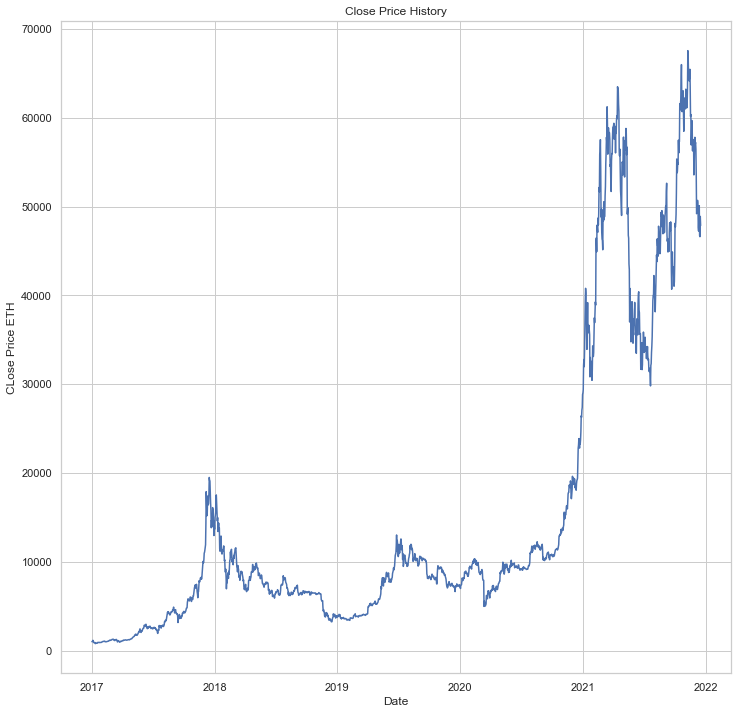

In [156]:
#Visualize the closing price history
plt.figure(figsize=(12,12))
plt.title('Close Price History')
plt.plot(df['btc_close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('CLose Price ETH', fontsize=12)
plt.show()

### Correlations

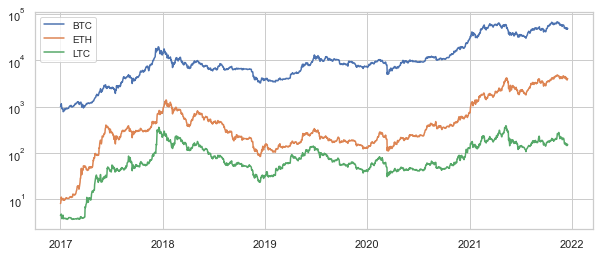

In [157]:
plt.figure(figsize=(10,4))
plt.yscale('log')
plt.plot(plot_df)
plt.legend(['BTC', 'ETH', 'LTC'], fontsize=10)

In [158]:
correlations = df.corr()["eth_close"]
correlations

btc_high         0.922579
btc_low          0.923415
btc_open         0.923064
btc_close        0.922345
btc_volume       0.487564
btc_adj_close    0.922345
eth_high         0.998931
eth_low          0.998970
eth_open         0.997897
eth_close        1.000000
eth_volume       0.625550
eth_adj_close    1.000000
ltc_high         0.742662
ltc_low          0.753530
ltc_open         0.746336
ltc_close        0.747466
ltc_volume       0.279175
ltc_adj_close    0.747466
Name: eth_close, dtype: float64

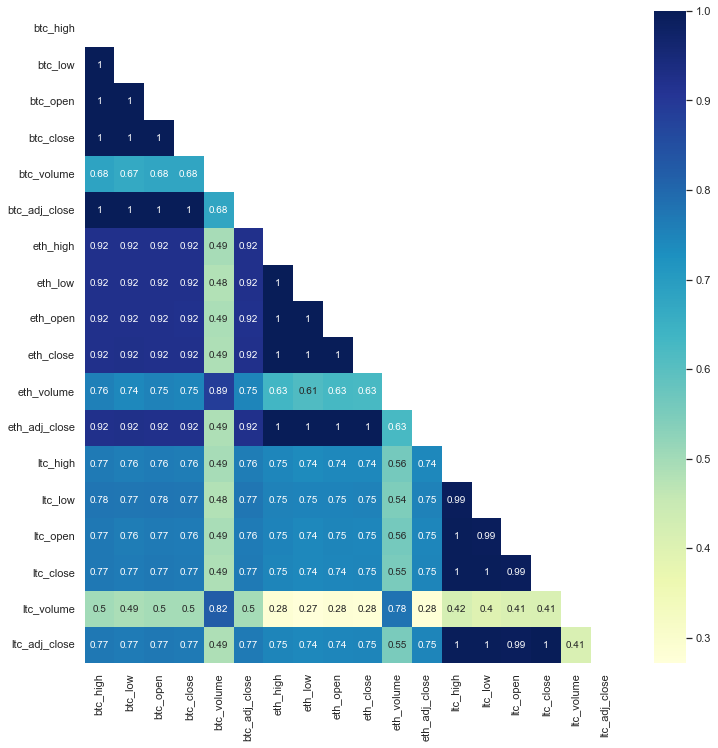

In [159]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(12, 12))
ax=sns.heatmap(df.corr(), mask=mask, annot=True,cmap="YlGnBu")
plt.show()

In [160]:
newdf = df.filter(["btc_close","eth_close","ltc_close","btc_volume","eth_volume","ltc_volume"], axis=1)
newdf

,btc_close,eth_close,ltc_close,btc_volume,eth_volume,ltc_volume
Date,,,,,,
2017-01-01,998.325012,8.172570,4.511590,1.477750e+08,1.473170e+07,1.133750e+07
2017-01-02,1021.750000,8.378510,4.648940,2.221850e+08,1.457960e+07,1.459530e+07
2017-01-03,1043.839966,9.725250,4.626200,1.851680e+08,3.362520e+07,1.005570e+07
2017-01-04,1154.729980,11.251600,4.837850,3.449460e+08,4.105120e+07,1.376240e+07
2017-01-05,1013.380005,10.254400,4.292720,5.101990e+08,4.155740e+07,1.919600e+07
...,...,...,...,...,...,...
2021-12-12,50098.335938,4134.453125,159.203964,2.193922e+10,1.405760e+10,8.705768e+08
2021-12-13,46737.480469,3784.226807,144.535904,3.216673e+10,2.399984e+10,1.097150e+09
2021-12-14,46612.632812,3745.440430,146.078003,3.463862e+10,2.383676e+10,1.150775e+09


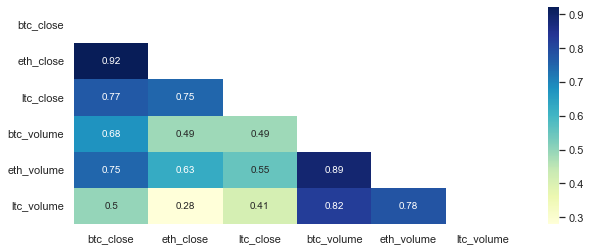

In [161]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(newdf.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 4))
ax=sns.heatmap(newdf.corr(), mask=mask, annot=True,cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='eth_close'>

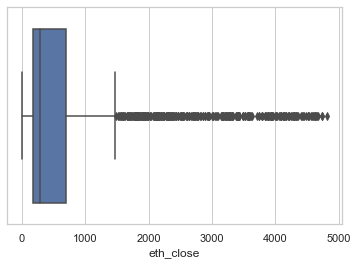

In [162]:
sns.boxplot(df.eth_close)

<AxesSubplot:xlabel='btc_volume'>

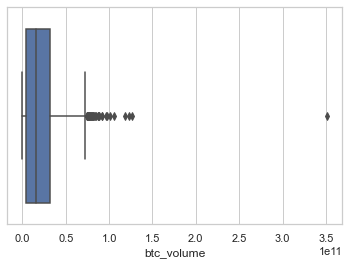

In [163]:
sns.boxplot(df.btc_volume)

<AxesSubplot:xlabel='btc_close'>

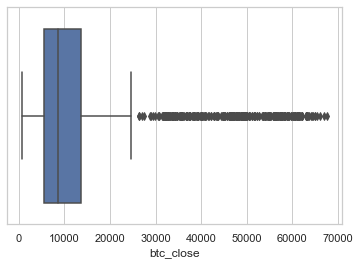

In [164]:
sns.boxplot(df.btc_close)

### Data Split

In [165]:
X=newdf.drop("eth_close", axis=1)
y=newdf.eth_close

In [166]:
X

,btc_close,ltc_close,btc_volume,eth_volume,ltc_volume
Date,,,,,
2017-01-01,998.325012,4.511590,1.477750e+08,1.473170e+07,1.133750e+07
2017-01-02,1021.750000,4.648940,2.221850e+08,1.457960e+07,1.459530e+07
2017-01-03,1043.839966,4.626200,1.851680e+08,3.362520e+07,1.005570e+07
2017-01-04,1154.729980,4.837850,3.449460e+08,4.105120e+07,1.376240e+07
2017-01-05,1013.380005,4.292720,5.101990e+08,4.155740e+07,1.919600e+07
...,...,...,...,...,...
2021-12-12,50098.335938,159.203964,2.193922e+10,1.405760e+10,8.705768e+08
2021-12-13,46737.480469,144.535904,3.216673e+10,2.399984e+10,1.097150e+09
2021-12-14,46612.632812,146.078003,3.463862e+10,2.383676e+10,1.150775e+09


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Scikit-learning 
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)

# Main metrics
print('R2:', r2_score(y_test, predictions))
print('MAE:', mae(y_test, predictions))
print('MSE:', mse(y_test, predictions, squared=False))

R2: 0.9275429391235734
MAE: 187.0422447935868
MSE: 307.95042566956596


In [169]:
# Using Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)

predicted_price = regressor.predict(X_test)


print('R2:', r2_score(y_test, predicted_price))
print('MAE:', mae(y_test, predicted_price)) 
print('MSE:', mse(y_test,predicted_price, squared=False)) 
print('Root MSE:', np.sqrt(mse(y_test, predicted_price)))

R2: 0.9734592087293936
MAE: 62.454336970405684
MSE: 186.37917510085452
Root MSE: 186.37917510085452


### Scaling

+ Normalize the range of independent variables.

In [170]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [171]:
X_test_scaled=std_scaler.transform(X_test)

### Models with scaled data

+ Use linear regression and Random Forest Regressor for modelling
+ Training the model using .fit
+ Get the predictions on the X_test using the .predict() function
+ Observe the result of the main metrics: 

    + R-squared: check the correlation level 
    + Mean absolute error (MAE): measures the absolute errors between paired observations
    + Mean standard error (MSE): measures the average squared difference between the estimated values and the actual value.


+ Check the main metrics using OLS (Ordinary Least Squares regression)


In [172]:
# OLS Regression

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              eth_close   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     2787.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:02:35   Log-Likelihood:                -10405.
No. Observations:                1445   AIC:                         2.082e+04
Df Residuals:                    1439   BIC:                         2.085e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        748.3987      8.549     87.543      0.0

In [173]:
#y_pred

In [174]:
# Sckit-learning
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

y
y_pred=model.predict(X_test_scaled)   # model prediction


y_pred_train=model.predict(X_train_scaled)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mae(y_test, y_pred))
print('MSE:', mse(y_test,y_pred, squared=False))

R2: 0.9275429399531524
MAE: 187.0422440735415
MSE: 307.9504239066653


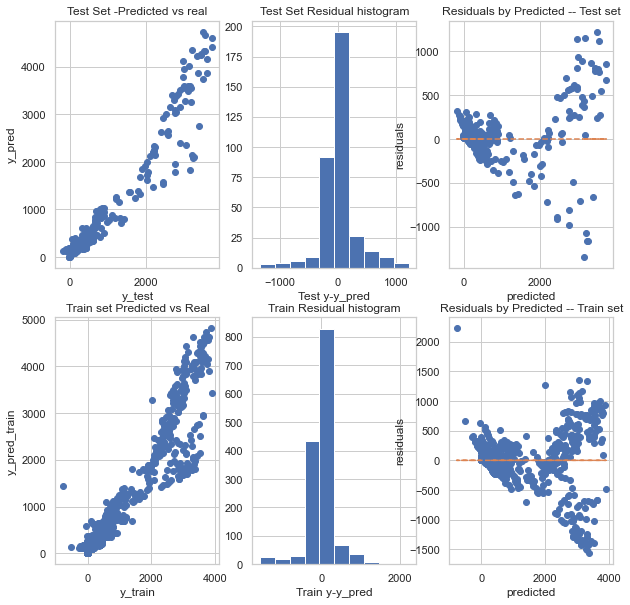

In [175]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predicted")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs Real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predicted")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

In [176]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [177]:
result.sort_index().tail(10)

,y_test,y_pred
Date,,
2021-11-03,4607.193848,3749.972509
2021-11-09,4735.068848,3516.817275
2021-11-12,4667.115234,3557.653898
2021-11-23,4340.763672,3544.459059
2021-11-24,4239.981445,3467.507577
2021-11-25,4274.743164,3466.005631
2021-12-03,4220.706055,3361.475890
2021-12-04,4119.587402,2983.345789
2021-12-06,4358.737305,3210.433707


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

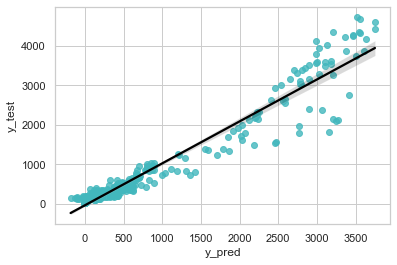

In [178]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#42B7BD"}, line_kws={"color": "black"})

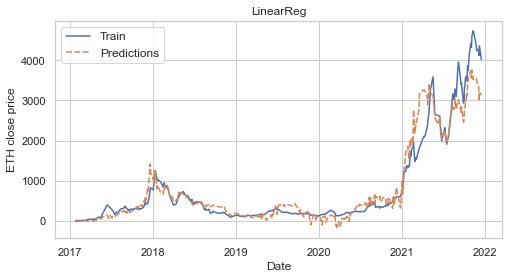

In [179]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.lineplot(data=result)
plt.title('LinearReg', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ETH close price', fontsize=12)
plt.legend(['Train','Predictions'], fontsize=12)

### Feature Importance

In [180]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by=["Importance"], ascending=False)

In [181]:
round(features_importances.head(50),1)

,Attribute,Importance
0,btc_close,920.8
3,eth_volume,311.4
4,ltc_volume,279.7
2,btc_volume,222.1
1,ltc_close,136.6


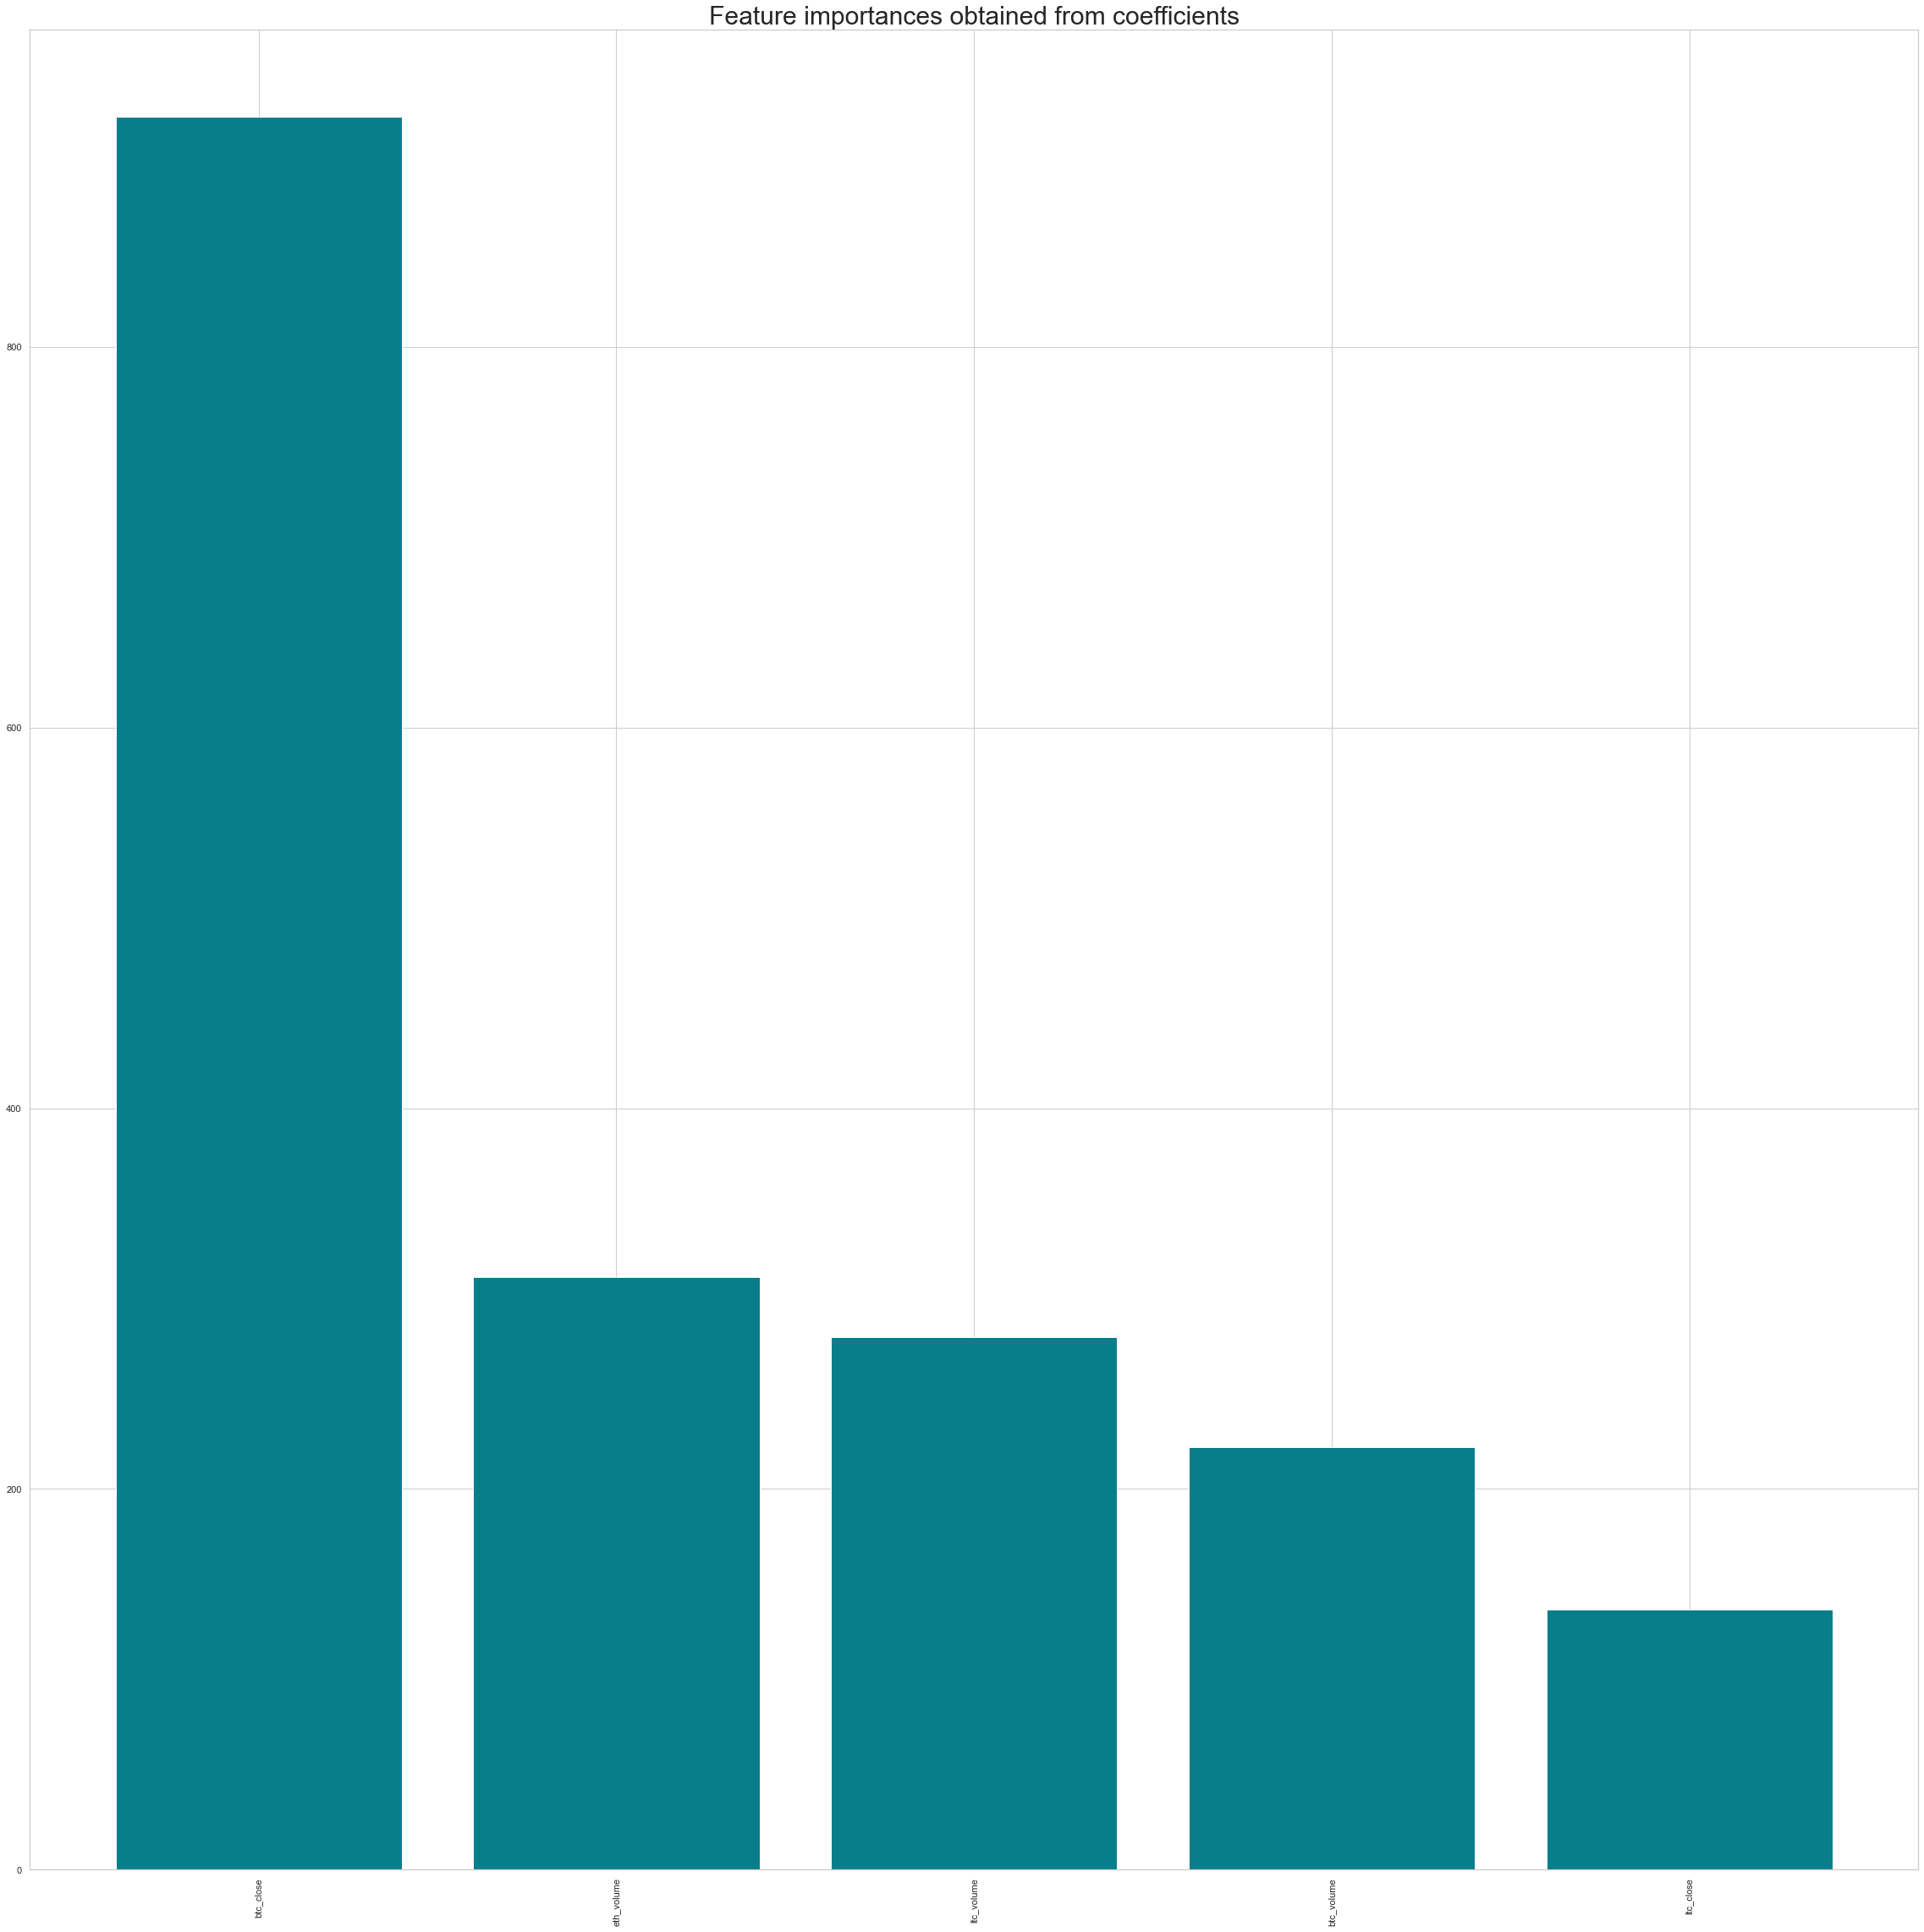

In [182]:
plt.figure(figsize=(40,40))
plt.bar(x=features_importances['Attribute'], height=features_importances["Importance"], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
# How to make fontsize bigger?

In [184]:
   def cross_val(model):
        pred = cross_val_score(model, X, y, cv=10)
        return pred.mean()

In [185]:
def models(X_train, y_train,X_test,y_test):
    models = {"linreg": LinearRegression(),
              'robustreg': RANSACRegressor(base_estimator=LinearRegression(), max_trials=100),
              "linlasso":Lasso(alpha=0.1),
              "ridgereg": Ridge(alpha=1.0),
              "knnreg": KNeighborsRegressor(),
              'randforestreg': RandomForestRegressor(n_estimators=200),
              'elasticnet': ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random')
              }

    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)  
        print(f"model:{model_name}") 
        print('R2:', r2_score(y_test, predictions))
        print('MAE:', mae(y_test, predictions))
        print('MSE:', mse(y_test, predictions, squared=False)) 
        print("+++++++++++++++")
        predictions_train = model.predict(X_train)  
        print(f"model:{model_name} trainset") 
        print('R2:', r2_score(y_train, predictions_train))
        print('MAE:', mae(y_train, predictions_train))
        print('MSE:', mse(y_train, predictions_train, squared=False)) 
        print("------------------------")
        
        

models(X_train, y_train,X_test,y_test)

model:linreg
R2: 0.9275429391235734
MAE: 187.0422447935868
MSE: 307.95042566956596
+++++++++++++++
model:linreg trainset
R2: 0.906398439179632
MAE: 185.1441808847366
MSE: 324.2962475012781
------------------------
model:robustreg
R2: 0.6877326496877723
MAE: 295.32424053389786
MSE: 639.2985818869589
+++++++++++++++
model:robustreg trainset
R2: 0.7220180937757368
MAE: 253.29720737003979
MSE: 558.8672268048589
------------------------
model:linlasso
R2: 0.9275431531060773
MAE: 187.042007693217
MSE: 307.94997094471927
+++++++++++++++
model:linlasso trainset
R2: 0.9063984391745656
MAE: 185.1441777598135
MSE: 324.2962475100546
------------------------
model:ridgereg
R2: 0.9275429429136713
MAE: 187.04224079440678
MSE: 307.9504176154007
+++++++++++++++
model:ridgereg trainset
R2: 0.9063984391796311
MAE: 185.14418125869094
MSE: 324.29624750127965
------------------------
model:knnreg
R2: 0.5611278495525152
MAE: 380.1059885794287
MSE: 757.8957353640709
+++++++++++++++
model:knnreg trainset
R2: 0